<a href="https://colab.research.google.com/github/kikiru328/Study_notebook/blob/main/Study_code/Deeplearning_framework/keras/keras02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST

In [ ]:
from keras.datasets import mnist
# mnist data load
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11501568/11490434 [==============================] - 1s 0us/step


In [ ]:
# train_shape
print(train_images.shape)
print(len(train_labels))
train_labels

(60000, 28, 28)
60000


array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
# test_shape
print(test_images.shape)
print(len(test_labels))
test_labels

(10000, 28, 28)
10000


array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [ ]:
# model structure
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation = 'relu', input_shape = (28*28,)))
network.add(layers.Dense(10, activation='softmax'))

In [ ]:
# model compile
network.compile(optimizer = 'rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [ ]:
# data loader
print(train_images.shape)
train_images_ = train_images.reshape( (60000, 28 * 28 ))
print(train_images_.shape)
train_images_ = train_images_.astype('float32') / 255
print(train_images_.shape)

print(test_images.shape)
test_images_ = test_images.reshape( (10000, 28 * 28 ))
print(test_images_.shape)
test_images_ = test_images_.astype('float32') / 255
print(test_images_.shape)

(60000, 28, 28)
(60000, 784)
(60000, 784)
(10000, 28, 28)
(10000, 784)
(10000, 784)


In [ ]:
# label loader
from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [ ]:
# fitting
network.fit(
    x = train_images_,
    y = train_labels,
    epochs = 5,
    batch_size = 128
)

Epoch 1/5
469/469 [==============================] - 2s 5ms/step - loss: 0.2566 - accuracy: 0.9260
Epoch 2/5
469/469 [==============================] - 2s 5ms/step - loss: 0.1036 - accuracy: 0.9686
Epoch 3/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0677 - accuracy: 0.9797
Epoch 4/5
469/469 [==============================] - 3s 5ms/step - loss: 0.0497 - accuracy: 0.9848
Epoch 5/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0370 - accuracy: 0.9890


In [ ]:
# test evaluation
test_loss, test_acc = network.evaluate(test_images_, test_labels)
print('test_acc > :', test_acc)

313/313 [==============================] - 0s 747us/step - loss: 0.0622 - accuracy: 0.9810
test_acc > : 0.9810000061988831


# 신경망을 위한 데이터 표현

        Tensor == 데이터를 위한 컨테이너

### 스칼라 0D 텐서

In [ ]:
# 하나의 숫자만 담고 있는 tensor == scalar ( numpy > float32, float64 ) tensor의 축 개수는 rank 

import numpy as np
x = np.array(12) # scalar tensor
print(x)
print(x.ndim) # number of dimensions


12
0


### 벡터 1D Tensor

In [ ]:
# 하나의 축을 가진 tensor

x = np.array( [12, 3, 6, 14, 7]) # 5개 원소 == 5차원 벡터.
print(x)
print(x.ndim)

# 5D 벡터는 하나의 축을 따라 5개의 차원을 가진 것. 5D tensor는 5개의 축을 가진 것.

[12  3  6 14  7]
1


### 행렬 metrix 2D Tensor

In [ ]:
x = np.array(
    [[5,78,2,34,0], # 행 > 1행 : [5,78,2,34,0]
     [6,79,3,35,1],
     [7,80,4,36,2]]
)
     # 열 > 1열 : [5,6,7]
print(x.ndim)

2


### 3D Tensor & 고차원 Tensor

In [ ]:
x = np.array(
    [[[5,78,2,34,0],
      [6,79,3,35,1],
      [7,80,4,36,2]],
     [[5,78,2,34,0],
      [6,79,3,35,1],
      [7,80,4,36,2]],
     [[5,78,2,34,0],
      [6,79,3,35,1],
      [7,80,4,36,2]]]
)

print(x.ndim)

# 3D tensor를 하나의 배열로 합치면 4D 텐서를 만드는 식으로 이어짐. 동영상 데이터를 다룰 경우에는 5D 텐서까지 가기도 함.

3


        축의 개수 (rank)    : np.ndim 에서 확인 가능
        크기 (shape)      : Tensor의 각 축을 따라 얼마나 많은 차원이 있는지를 나타내느 파이썬의 tuple
                            위의 3D Tensor의 크기는 (3,3,5) , 2D Tensor의 크기는 (3,5), 1D 벡터의 크기는 (5,), Scalar의 크기는 ()
        데이터 타입         : numpy에서는 dtype에 저장. ( float32, uint8, float64 )

In [ ]:
# MNIST dataset
from keras.datasets import mnist
(train_images, train_labels) , (test_images, test_labels) = mnist.load_data()

In [ ]:
# 축 확인
print(train_images.ndim)
print(train_images.shape)
print(train_images.dtype)

# 8비트 정수형 3D 텐서
# 28 x 28 크기의 정수 행렬 6만개가 있는 배열.
# 각 행렬은 하나의 흑백 이미지. 행렬의 각 원소는 0~255 사이값을 가짐.

3
(60000, 28, 28)
uint8


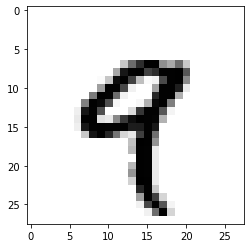

In [ ]:
# 3D Tensor에서 5번째 샘플 확인
digit = train_images[4]
from matplotlib import pyplot as plt
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

### numpy로 Tensor 조정

In [ ]:
my_slice = train_images[10:100] # 11번째 ~ 101번째까지
print(my_slice.shape)

my_slice = train_images[10:100, :, :]
print(my_slice.shape)

my_slice = train_images[10:100, 0:28, 0:28]
print(my_slice.shape)

(90, 28, 28)
(90, 28, 28)
(90, 28, 28)


In [ ]:
# 오른쪽 하단 14x14 픽셀 선택시
my_slice = train_images[:, 14:, 14:]
print(my_slice.shape)

# 음수 index
my_slice = train_images[:, 7:-7, 7:-7]
print(my_slice.shape)

(60000, 14, 14)
(60000, 14, 14)


### 배치 데이터

In [ ]:
# 일반적으로 딥러닝에서 사용하는 모든 데이터 Tensor의 첫 번째 축 == 샘플 축
# MNIST [0] == 숫자 이미지
# 딥러닝 모델은 한 번에 전체 데이터셋을 처리하지 않는다. 대신 데이터를 batch로 나눔.

batch_size = 128
batch_1 = train_images[:128]
batch_2 = train_images[128:256]
# batch_n = train_images[128 * n : 128 * (n+1)]

# 배치 데이터를 다룰 때는 첫 번째 축을 배치 축 또는 배치 차원이라고 부름.

### Tensor 실제사례

In [ ]:
# 벡터 데이터 > (samples, features) 크기의 2D
# 시계열 데이터 또는 시퀀스 데이터 > (samples, timesteps, features) 크기의 3D 텐서
# 이미지 > (samples, height, width, channels) 또는 (samples, channels, height, width) 크기의 4D 텐서
# 동영상 > (samples, frames, height, width, channels) 또는 (samples, frames, channels, height, width) 크기의 5D 텐서

### 벡터 데이터

In [ ]:
# 대부분의 경우 해당. 데이터셋에서는 하나의 데이터 포인트가 벡터로 인코딩 될 수 있으므로 배치 데이터는 2D 텐서로 인코딩.
# 첫 번째 축은 샘플 축, 두 번째 축은 특성 축
# 사람의 나이, 우편 번호, 소득으로 구성된 인구 통계 데이터. 각 사람은 3개의 값을 가진 벡터로 구성, 10만 명이 포함된 전체 데이터셋은 (100000,3) 크기의 텐서에 저장될 수 있다.
# (공통 단어 2만 개로 만든 사전에서) 각 단어가 등장한 횟수로 표현된 텍스트 문서 데이터셋. 각 문서는 2만 개의 원소(사전에 있는 단어마다 하나의 원소에 대응합니다.) 를 가진 벡터로 인코딩 될 수 있습니다.
# 500개의 문서로 이루어진 전체 데이터셋은 (500, 20000) 크기의 텐소로 저장.

### 시계열 데이터 또는 시퀀스 데이터

In [ ]:
# 데이터에서 시간이 중요할 때는 시간 축을 포함하여 3D텐서로 저장됨.
# 각 샘플은 벡터의 시퀀스로 인코딩되므로 배치 데이터는 3D 텐서로 인코딩치
# 관례적으로 시간 축은 항상 두 번째 축( 인덱스 ==1 ). 
# 주식 가격 데이터 셋 >  1분 마다 현재 주식 가격, 지난 1분 동안에 최고 가격과 최소 가격을 저장. 1분마다 데이터는 3D 벡터로 인코딩되고 하루 동안의 거래는 (390,3) 크기의 2D 텐서로 인코딩됩니다. (하루 거래 390분)
# 250일치의 데이터는 (250, 390, 3) 크기의 3D 텐서로 저장될 수 있음. 여기에서 1일치 데이터가 하나의 샘플
# 트윗 데이터셋 >  각 트윗은 128개의 알파벳으로 구성된 280개의 문자 시퀀스. 여기에서는 각 문자가 128개의 크기인 이진 벡터로 인코딩 (해당 문자의 인덱스만 1, 나머지 0). 그러면 각 트윗은 (280,128) 크기의 2D 
# 텐서로 인코딩 될 수 있음. 100만 개의 트윗으로 구성된 데이터셋은 (1000000, 280,128) 크기의 텐서.

## 이미지 데이터

In [ ]:
# 이미지는 전형적으로 높이, 너비, 컬러 채널의 3차원으로 이루어짐. MNIST 숫자처럼 흑백 이미지는 하나의 컬러 채널만을 가지고 있어 2D 텐서로 저장. 관례상 이미지 텐서는 3D로 저장.
# 흑백 이미지의 경우 컬러 채널의 차원 크기는 1. 256x256 크기의 흑백 이미지에 대한 128개의 배치는 (128, 256,256, 1) 크기의 텐서에 저장될 수 있음.
# 컬러 이미지에 대한 128개의 배치라면 (128, 256, 256, 3) 크기의 텐서에 저장.

# 이미지 텐서의 크기를 지정하는 방식은 두 가지.

# (Tensorflow) 채널 마지막 방식    //    (씨아노) 채널 우선 방식.
# 구글의 tensorflow 머신 러닝 프레임워크는 (samples, height, width, color_depth)처럼 컬러 채널의 깊이를 끝에 놓는다.
# 씨아노는 (samples, color_depth, height, width)처럼 컬러 채널의 깊이를 배치 축 바로 뒤에 놓음.
# 씨아노 방식을 사용하면 앞선 예제 > (128, 1, 256, 256) 그리고 (128, 3, 256, 256)
# 케라스는 두개 다 지원

### 비디오 데이터

In [ ]:
# 비디오 데이터는 현실에서 5D 텐서가 필요한 몇 안되는 데이터 중 하나. 하나의 비디오는 프레임의 연속, 각 프레임은 하나의 컬러 이미지.
# 프레임이 (height, width, color_depth) 의 3D Tensor로 저장될 수 있기 때문에 프레인의 연속은 (frames, height, width, color_depth) 4D Tensor 로 저장
# 여러 비디오의 배치는 (samples, frames, height, width, color_depth) 로 5D Tensor.
 
# 예를 들어 60초짜리 144x256 유튜브 비디오 클립을 초당 4frame 으로 샘플링 하면 240 프레임.
#  이런 비디오 클립을 4개 가진 배치는 (4, 240,144,256,3)

# 신경망의 톱니바퀴 & 텐서연산

In [ ]:
# Dense 층
"""Keras.layers.Dense(512, activation='relu')"""

# 2D 텐서를 입력으로 받고 입력 텐서의 새로운 표현인 또 다른 2D 텐서를 반환하는 함수 (w는 2D텐서, b는 벡터)
"""output = relu(dot(w, input) +b)"""

# 자세하게
# 입력 텐서와 텐서 w 사이의 점곱(dot), 점곱의 결과인 2D 텐서와 벡터 b 사이의 덧셈(+), 마지막으로 relu 연산

### 원소별 연산

In [ ]:
# relu 함수와 덧셈은 원소별 연산.

# 단순 원소별 연산
def naive_relu(x):
    assert len(x.shape) == 2 # x s는 2D 넘파이 배열
    # assert : 가정설정문. assert 뒤의 조건이 True가 아니면 AssertError를 발생시킨다.
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i,j] = max(x[i,j],0)
    return x

# 덧셈 - 동일한 2D 텐서만 지원
def naive_add(x,y):
    assert len(x.shape) == 2 # x,y 2D 넘파이 배열
    assert x.shape == y.shape
    
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i,j] += y[i,j]
    return x

# 같은 원리로 원소별 곱셈, 뺄샘 등을 활용

In [ ]:
# numpy 원소별 연산
# import numpy as np
# z = x + y # 원소별 덧셈
# z = np.maximum(z, 0.) # 월소별 Relu 함수

### 브로드캐스팅

In [ ]:
# 모호하지 않고 실행 가능하다면 작은 텐서가 큰 텐서의 크기에 맞추어 브로드캐스팅이 됨.
# 1) 큰 텐서의 ndim에 맞도록 작은 텐서에 축이 추가됨. ( 브로드캐스팅 축 )
# 2) 작은 텐서가 새 축을 따라서 큰 텐서의 크기에 맞도록 반복됨.

In [ ]:
# x 의 크기는 (32, 10), y 의 크기는 (10,) 일 때,
# y에 비어있는 첫 번째 축을 추가하여 (1, 10) 으로 만듬
# 그 다음 y를 이 축에 32번 반복하면 tensor y 는 (32, 10) 이 됨.
# 여기서 Y[i, :] == y for i in range(0, 32)가 됨.
# 그러면 x, y 의 크기가 같으므로 더할 수 있게 된다.

In [ ]:
# 구현 입장에서 새로운 텐서가 만들어지면 매우 비효율적이여서 어떤 2D 텐서도 만들어지지 않는다.
# 반복된 연산은 완전히 가상적.
# 새로운 축을 따라 벡터가 32번 반복된다는 것으로 생각하면 됨.

# 단순 구현
def navie_add_matrix_and_vector(x,y):
    assert len(x.shape) == 2  # 2D 넘파이 배열
    assert len(y.shape) == 1  # y는 넘파이 배열
    assert x.shape[1] == y.shape[0]
    
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i,j] += y[j]
    return x

In [ ]:
# (a, b, ... n, n+1, ... m) 크기의 텐서와 (n, n+1, ... m) 크기의 텐서 사이에 브로드캐스팅으로 원소별 연산을 적용.
# 이때 브로드캐스팅은 a 부터 n-1까지의 축에 자동으로 일어남.
# 두 텐서에 브로드캐스팅으로 원소별 maximum 연산을 적용하는 예.

import numpy as np
x = np.random.random( (64, 3, 32, 10))  # x는 (64,3,32,10) 크기의 랜덤 텐서
y = np.random.random( (32,10) ) # y는 (32,10) 크기의 랜덤 텐서
z = np.maximum(x,y) #출력 z 크기는 x와 동일하게 (64,3,32,10) .

### 텐서 점곱

In [ ]:
# 텐서 곱셈이라고도 부르는 (원소별 곱셈과 혼동하지 마세요). 점곱 연산은 가장 널리 사용되고 유용한 텐서 연산
# - 원소별 연산과 반대로 입력 텐서의 원소들을 결합시킨다.
# numpy, keras, Tensorflow에서 원소별 곱셈은 * 연산자 사용. Tensorflow에서는 dot 연산자가 다르지만 numpy, keras는 점곱 연산에 보편적인 dot 연산자를 사용

import numpy as np
z = np.dot(x,y)
z = x * y

# 점곱 연산은 2개의 벡터 x,y 의 점곱은 아래와 같음

def naive_vector_dot(x,y):
    assert len(x.shape) == 1
    assert len(y.shape) == 1
    assert x.shape[0] == y.shape[0]
    
    z = 0.
    for i in range(x.shape[0]):
        z += x[i] * y[i]
    return z



# 두 벡터의 점곱은 스칼라, 원소 개수가 같은 벡터끼리 점곱이 가능함

# 행렬 x와 벡터 y 사이에서도 점곱이 가능합니다.
# y와 x의 행 사이에서 점곱이 일어나므로 벡터가 반환됨.

import numpy as np
def naive_matrix_vector_dot(x,y):
    assert len(x.shape) == 2 # x : np.array
    assert len(y.shape) == 1 # y : np.array
    assert x.shape[1] == y.shape[0] # x의 두 번째 차원이 y의 첫 번째 차원과 같아야 함

    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            z[i] += x[i,j] * y[j]
    return z

In [ ]:
def navive_matrix_vector_dot(x,y):
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        z[i] = naive_vector_dotx(x[i,:],y)
    return z

# 두 텐서 중 하나라고 ndim이 1보다 크면 dot 연산에 교환 법칙이 성립되지 않습니다.
dot(x, y) != dot(y, x)

# 물론 점곱은 임의의 축 개수를 가진 텐서에 일반화 됨.
# 가장 일반적인 용도는 두 행렬 간의 점곱일 것이다.

if x.shape[1] == y.shape[0] : dox(x,y)

# x의 행과 y의 열 사이 벡터 점곱으로 인해 (x.shape[0], y.shape[1]) 크기의 행렬.

In [ ]:
# 단순한 구현

def naive_matrix_dot(x,y):
    assert len(x.shape) == 2
    assert len(y.shape) == 2 
    assert x.shape[1] == y.shape[0]

    z = np.zeros( (x.shape[0], y.shape[1]))
    for i in range(x.shape[0]):
        for j in range(y.shape[1]):
            row_x = x[i, :]
            column_y = y[: j]
            z[i, j] = naive_vector_dot(row_x, column_y)
    return z

# 입력과 출력을 배치하면 아래와 같음

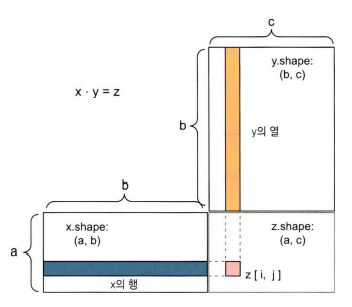

        
        x,y,z는 직사각형 모양으로 그려져 있습니다. (원소들이 채워진 박스라고 생각하면 됨.) 
        x의 행 벡터와 y의 열 벡터가 같은 크기여야 함. 자동으로 x의 너비는 y의 높이와 동일해야 합니다. 
        새로운 머신 러닝 알고리즘을 개발할 때 이런 그림을 자주 그림.

        더 일반적으로는 앞서 설명한 2D의 경우처럼 크기를 맞추는 동일한 규칙을 따르면
        다음과 같이 고차원 텐서 간의 점곱을 할 수 있다.
        (a,b,c,d) • (d,) -> (a,b,c)
        (a,b,c,d) • (d,e) -> (a,b,c,e)

### 텐서 크기 변환

In [ ]:
# 첫 번째 신경망 예제의 Dense 층에서는 사용되지 않음. 신경망에 주입할 숫자 데이터를 전처리할 때 사용함.
train_images = train_images.reshape( (60000, 28 * 28) )

# 텐서의 크기를 변환한다는 것 == 특정 크기에 맞게 열과 행을 재배열한다는 것.
# 크기 변환된 텐서는 원래 텐서와 원소 개수가 동일.

In [ ]:
x = np.array([ [0., 1.],
              [2., 3.],
              [4., 5.] ])
print("x_shape >" , x.shape)             

x = x.reshape( (6,1) )
print("x_reshape >" , x.shape)             

print('\nx _ array > ' ,x )

x = x.reshape( (2,3) )
print("x_reshape >" , x.shape)       
print('\nx _ array > ' ,x )

x_shape > (3, 2)
x_reshape > (6, 1)

x _ array >  [[0.]
 [1.]
 [2.]
 [3.]
 [4.]
 [5.]]
x_reshape > (2, 3)

x _ array >  [[0. 1. 2.]
 [3. 4. 5.]]


In [ ]:
# "전치" ( transposition ). 행렬의 전치는 행과 열을 바꾸는 것을 의미.
# x[i, :] ->  x[:, i]
import numpy as np
x = np.zeros( (300,200) )
x = np.transpose(x)
print(x.shape)

(200, 300)


### 텐서 연산의 기하학적 해석

In [ ]:
# 텐서 연산이 조작하는 텐서의 내용은 어떤 기하학적 공간에 있는 좌표 포인트로 해석됨.
# 따라서 모든 텐서 연산은 기하학적 해석.

A = [0.5, 1] # 2D coordinate
# 2D 내 벡터이므로 원점에서 포인트를 연결하는 화살표로 벡터를 나타냄.
# 새로운 포인트
B = [1, 0.25]
# 이 포인트를 A 포인트와 덧셈을 하면 아래와 같음

![](https://github.com/kikiru328/Study_notebook/blob/main/Study_code/Deeplearning_framework/keras/2022-05-07-18-27-46.png?raw=1)

In [ ]:
# 일반적으로 아핀 변환 ( affine transformation ), 회전, 스케일링 ( scaling ) 등 처럼 기본적인 기하학적 연산은 텐서 연산으로 표현될 수 있다.
        # 아핀변환 : 점, 직선, 평면을 보존하는 아핀 공간으로의 변환. 이 변환은 거리의 비율과 직선의 평행을 유지하는 이동, 스케일링, 회전 등을 포함.
# 예를 들어 theta 각도로 2D 벡터를 회전하는 것은 2 x 2 행렬 R = [ u, v ] 를 점곱하여 구현할 수 있다.
# 여기서 u, v는 동일 평면상의 벡터.
u = [ cos(thesta), sin(theta) ]
v = [ -sin(theta), cos(theta) ]

### 딥러닝의 기하학적 해석

In [ ]:
# 신경망은 전체적으로 텐서 연산의 연결
# 텐서 연산은 입력 데이터의 기하학적 변환.
# 단순한 단계들이 길게 이어져 구현된 신경망 --> 고차원 공간에서 매우 복잡한 기하학적 변환을 하는 것.
# 심층 네트워크의 각 층은 데이터를 조금씩 풀어 주는 변환을 적용한다.  
# 이러한 층을 깊게 쌓으면 아주 복잡한 분해 과정을 처리할 수 있다.

# 신경망의 엔진 : 그래디언트 기반 최적화

In [ ]:
# 첫 번째 신경망 예제에 있는 각 층은 입력 데이터를 다음과 같이 변환한다.
output = relu(dot(W, input) + b)
# 이 식에서 텐서 W와 b는 층의 속성처럼 볼 수 있다.
# 가중치 (weight) 또는 훈련된 파라미터 (trainable parameter)라고 불림. ( 각각 커널 (kernel)과 편향 (bias) 라고도 함. )

# 초기에는 가중치 행렬이 작은 난수로 채워져있음. (무작위 초기화 (random initalization) 단계라고 부름.)
# 물론 W와 b가 난수일 때 Relu(dot(W, input) + b ) 가 유용한 어떤 표현을 만들 것이라고 기대할 수 없음.
# 훈련은 다음과 같은 훈련 반복 루프 (training loop) 안에서 일어남.
# 필요한 만큼 반복 루프안에서 이런 단계가 반복됨.
#   1. 훈련 샘플 x 와 이레 상응하는 타긴 y의 배치를 추출함.
#   2. x를 사용하여 네트워크를 실행하고 (정방향 패스 (forward pass) 단계), 예측 y_pred를 구함.
#   3. y_pred와 y의 차이를 측정하여 이 배치에 대한 네트워크의 손실을 계산함.
#   4. 배치에 대한 손실이 조금 감소되도록 네트워크의 모든 가중치를 업데이트 함.
# 결국 훈련 데이터에서 네트워크의 손실. 예측 y_pred와 타깃 y의 오차가 매우 작아질 것.
# 이 네트워크는 입력에 정확한 타깃을 매핑하는 것을 학습함.
# 개별적인 가중치 값이 있을 때 값이 증가해야할 지, 감소해야할 지 얼마큼 업데이트 할 지 아는 법
#   네트워크 가중치 행펼의 원소를 모두 고정하고 관심 있는 하나만 다른 값을 적용해 본다.
#   이 가중치의 초깃값이 0.3 이라고 가정. 배치 데이터를 정방향 패스에 통과시킨 후 네트워크의 손실이 0.5가 나옴.
#   이 가중치의 값을 0.35라고 변경하고 다시 정방향 패스를 실행, 손실이 0.6으로 증가.
#   반대로 0.25로 줄이면 손실이 0.4로 감소. 이 경우에는 가중치를 -0.05만큼 업데이트한 것이 손실을 줄이는데 기여함. 이런식으로 진행
# 이런 접근 방식은 모든 가중치 행렬의 원소마다 두 번의 (비용이 큰) 정방향 패스를 계산해야 함 >> 비효율
# 신경망에 사용뙨 모든 연산이 미분 가능 하다는 장점을 사용, 네트워크 가중치에 대한 손실의 그래디언트를 계산하는 것이 훨씬 더 좋은 방법.
# 그래디언트의 반대방향으로 가중치를 이동하면 손실이 감소된다.

### 변화율

In [ ]:
# 실수 x를 새로운 실수 y로 매핑하는 연속적이고 매끄러운 함수 f(x) = y 
# 해당 함수는 연속적이므로 x의 변화가 y를 변환시킬 것.
# x를 epsilon_x 만큼 증가시키면 y는 epsilon_y 만큼 바뀜
f(x + epslion_x) = y + epsilon_y

# 또 이 함수가 매끈하므로 (곡선의 각도가 갑자기 바뀌지 않음) epslion_x가 충분히 작으면
# 어떤 포인트 p에서 기울기 a의 선형 함수로 f를 근사할 수 있다.
# 따라서 epsilon_y는 a * epsilon_x 가 된다.
f(x + epsilon_x) = y + a * epsilon_x

In [ ]:
# 이 선형 근사는 x가 p에 충분히 가까울 때 유효함.
# 이 기울기를 p에서 f의 "변화율 (derivative)" 
# 이는 a가 음수일 때 p에서 양수 x만큼 조금 이동하면 f(x)가 감소한다는 것.
# a가 양수일 때는 음수 x만큼 조금 이동하면 f(x)가 감소된다.
# a의 절대값 (변화율의 크기)은 이런 증가나 감소가 얼마나 빠르게 일어날지 알려줌.
# 모든 미분 가능한 함수 f(x)에 대해 x의 값을 f의 국부적인 선형 근사인 그 지점을 기울기로 매핑하는 변화율 함수 f'(x)가 존재.
# 예를 들어 cos(x)의 변화율은 -sin(x)이고, f(x) = a * x 의 변화율은 f'(x) = a 이다.
# f(x)를 최소화하기 위해 epsilon_x만큼 x를 업데이트하고 싶을 때 f의 변화율을 알고 있으면 해결됨.
# 변화율 함수는 x가 바뀜에 따라 f(x)가 어떻게 바뀔지 설명이 됨.

### 텐서 연산의 변화율 : 그래디언트

In [ ]:
# 그래디언트는 텐서 연산의 변화율.
# 이는 다차원 입력, 즉 텐서를 입력으로 받는 함수에 변화율 개념을 확장시킨 것.
# 입력 벡터 x, 행렬 W, 타깃 y와 손실 함수 Loss가 있다고 가정.
# W를 사용하여 타깃의 예측 y_pred를 계산하고 손실, 즉 타깃 예측 y_pred와 타깃 y 사이의 오차를 계산할 수 있다.
y_pred = dot(W,x)
loss_value = loss(y_pred, y)
# 입력 데이터 x와 y가 고정되어 있다면 이 함수는 W를 손실 값에 매핑하는 함수로 볼 수 있다.
loss_value = f(W)
# W의 현재 값을 W0라고 합시다. 포인트 W0에서 f의 변화율은 W와 같은 크기의 텐서인 gradient(f)(W0).
# 이 텐서의 각 원소 gradientg(f)(W0)[i,j]는 W0[i,j]를 변경했을 때 loss_value가 바뀌는 방향과 크기를 나타냄.
# 다시 말해 텐서 gradient(f)(W0)가 W0에서 함수 f(W) = loss_value 의 그래디언트

# 앞서 함수 f(x)의 변화율 하나는 곡선 f의 기울기로 해석할 수 있다는 것.
# 비슷하게 gradient(f)(W0)는 W0에서 f(W)의 기울기를 나타내는 텐서로 해석할 수 있다.

# 그렇기 떄문에 함수 f(x)에 대해서는 변화율의 반대 방향으로 x를 조금 움직이면 f(x)의 값을 감소시킬 수 있다.
# 동일한 방식을 적용하면 함수 f(W)의 입장에서는 그래디언트의 반대 방향으로 W를 움직이면 f(W)의 값을 줄일 수 있다.

### 확률적 경사 하강법

In [ ]:
# 미분 가능한 함수가 주어지면 이론적으로 이 함수의 최솟값을 해석적으로 구할 수 있다.
# 함수의 최솟값은 변화율이 0인 지점.
# 따라서 변화율이 0이 되는 지점을 모두 찾고, 이 중에서 어떤 포인트의 함수 값이 가장 작은지 확인하는 것.

# 신경망에 적용하면 가장 작은 손실 함수의 값을 만드는 가중치의 조합을 해석적으로 찾는 것을 의미.
# 이는 식 gradient(f)(W) = 0을 풀면 해결된다.
# 이 식은 N개의 변수로 이루어진 다항식. ( N = 네트워크의 가중치 개수 )
# N = 2나 N = 3인 식을 푸는 것은 가능, 하지만 실제 신경망에서는 파라미터의 개수가 수천 개 보다 적은 경우가 거의 없고, 종종 수천 "만"개 임.
# 따라서 미분 가능한 함수를 가지고 있으므로 그래디언트를 계산하여 호율적으로 구현이 가능함.
# 그래디언트의 반대 방향으로 가중치를 업데이트하면 손실이 매번 조금씩 감소할 것.
#   1. 훈련 샘플 배치 x와 이에 상응하는 타깃 y를 추출함.
#   2. x로 네트워크를 실행하고 예측 y_pred를 구함
#   3. 이 배치에서 y_pred와 y 사이의 오차를 측정하여 네트워크의 손실을 계산.
#   4. 네트워크의 파라미터에 대한 손실 함수의 그래디언트를 계산 ( 역방향 패스 )
#   5. 그래디언트의 반대 방향으로 파라미터를 조금 이동. W -= step * gradient >> 배치에 대한 손실이 감소할 것.

# 위에서 얘기한 것 == 미니 배치 확률적 경사 하강법
# 확률적이란 단어는 각 배치 데이터가 무작위로 선택됨.

In [ ]:
# 업데이트,할 다음 가중치를 계산할 때 현재 그래디언트 값만 보지 않고 이전에 업데이트된 가중치를 여러 가지 다른 방식으로 고려하는 SGD변종이 있음.
# 예를 들어 모멘텀을 사용한 SGD, Adagrad, RMSprop등.
# 이런 변종들을 모두 최적화 (OPTIMIZER) 라고 한다.
# 특히 여러 변종들에서 사용하는 모멘텀 (MOMENTUM) 
# 모멘텀은 SGD에 있는 2개의 문제점인 수렴 속도와 지역 최솟값을 해결함.

![](![](2022-05-07-19-08-34.png).png)

In [ ]:
# MOMENTUM 구현
past_velocitiy = 0.
momentum = 0.1 # 모멘텀 상수
while loss > 0.01: # 최적화 반복 루프
        w, loss, gradient = get_current_parameters()
        velocity = momentum * past_velocitiy - learning_rate * gradient
        w = w + momentum * velocity - learning_rate * gradient
        past_velocitiy = velocity
        update_parameter(w)

### 변화율 연결 : 역전파 알고리즘

In [ ]:
# 앞의 알고리즘에서 함수가 미분 가능하기 때문에 변화율을 직접 계산할 수 있다고 가정.
# 실제로 신경망은 많은 텐서 연산으로 구성되어 있고, 이 연산들의 변화율은 간단하며 이미 잘 알려져 있다.
# 3개의 텐서 연산 a,b,c와 가중치 행렬 W1, W2, W3로 구성된 네트워크 f를 예로 들어봄.
f(W1, W2, W3) = a(W1, b(W2, c(W3)))

# 연쇄 법칙을 신경망의 그래디언트 계산에 적용하여 역전파 알고리즘 ( 후진 모드 자동 미분 ) 이 만들어짐.
# 역전파는 최종 손실 값부터 시작된다.
# 손실 값에 각 팔파미터가 기여한 정도를 계산하기 위해 연쇄 법칙을 적용하여 최상위 층에서 하위층까지 거꾸로 진행.

# 예제 다시 살피기

In [ ]:
# 입력 데이터
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
trtain_images = train_images. reshape( (60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape( (10000, 28 * 28))
test_images = test_images.astype('float32') / 255

# 입력 이미지의 데이터 타입은 float32로, 훈련 데이터는 (60000, 784). 테스트 데이터는 (10000, 784).
# 사용할 신경망
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

# 이 네트워크는 2개의 Dense 층이 연결되어 있고 각 층은 가중치 텐서를 포함하여 입력 데이터에 대한 몇 개의 간단한 텐서 연산을 적용.
# 층의 속성인 가중치 텐서는 네트워크가 정보를 저장하는 곳.
# 네트워크 컴파일
network.compile(optimizer='rmsprop',
                loss = 'categorical_crossentropy',
                metrics = ['accuracy'])

# 훈련 반복
network.fit(train_images, train_labels, epochs = 5, batch_size = 128)

# 요약

    - 학습은 훈련 데이터 샘플과 그에 상응하는 타깃이 주어졌을 때 손실 함수를 최소화하는 모델 파라미터의 조합을 찾는 것을 의미.
    - 데이터 샘플과 타깃의 배칠플 랜덤하게 뽑고 이 배치에서 손실에 대한 파라미터의 그래디언트를 계산함으로써 학습이 진행됨.
      네트워크의 파라미터는 그래디언트의 반대 방향으로 조금씩 (학습률에 의해 정의된 크기만큼) 움직인다.
    - 전체 학습 과정은 신경망이 미분 가능한 텐서 연산으로 연결되어 있기 떄문에 가능.
      현재 파라미터와 배치 데이터를 그래디언트 값에 매핑해 주는 그래디언트 함수를 구성하기 위해 미분의 연쇄 법칙을 사용한다.
    - 손실은 훈련하는 동안 최소화해야 할 양. 해결하려는 문제의 성공을 측정하는ㅁ데 사용됨.
    - 옵티마이저는 손실에 대한 그래디언트가 파라미터를 업데이트하는 정확한 방식을 정의함.